In [1]:
import wrangle as w
import explore as e
import wrangle_Naomi as wn
import env

import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

from importlib import reload
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
reload(w)
df = w.wrangle_zillow()

In [3]:
df.shape

(77375, 19)

In [4]:
train, validate, test = w.tvt_split(df)

In [5]:
train.head(1)

,parcel_id,bath_count,bed_count,calc_bath_and_bed,calc_sqft,fips,fireplace_count,garage_car_count,latitude,longitude,lot_sqft,pool_count,raw_census_tract_block,region_id_county,room_count,tax_value,assessment_year,log_error,transaction_date
73693,12021842,4.0,3.0,4.0,3547.0,6037.0,0.0,0.0,34094724.0,-118387946.0,17285.0,1.0,6.037194e+07,3101.0,0.0,2321157.0,2016.0,-0.009462,1504656000000000000


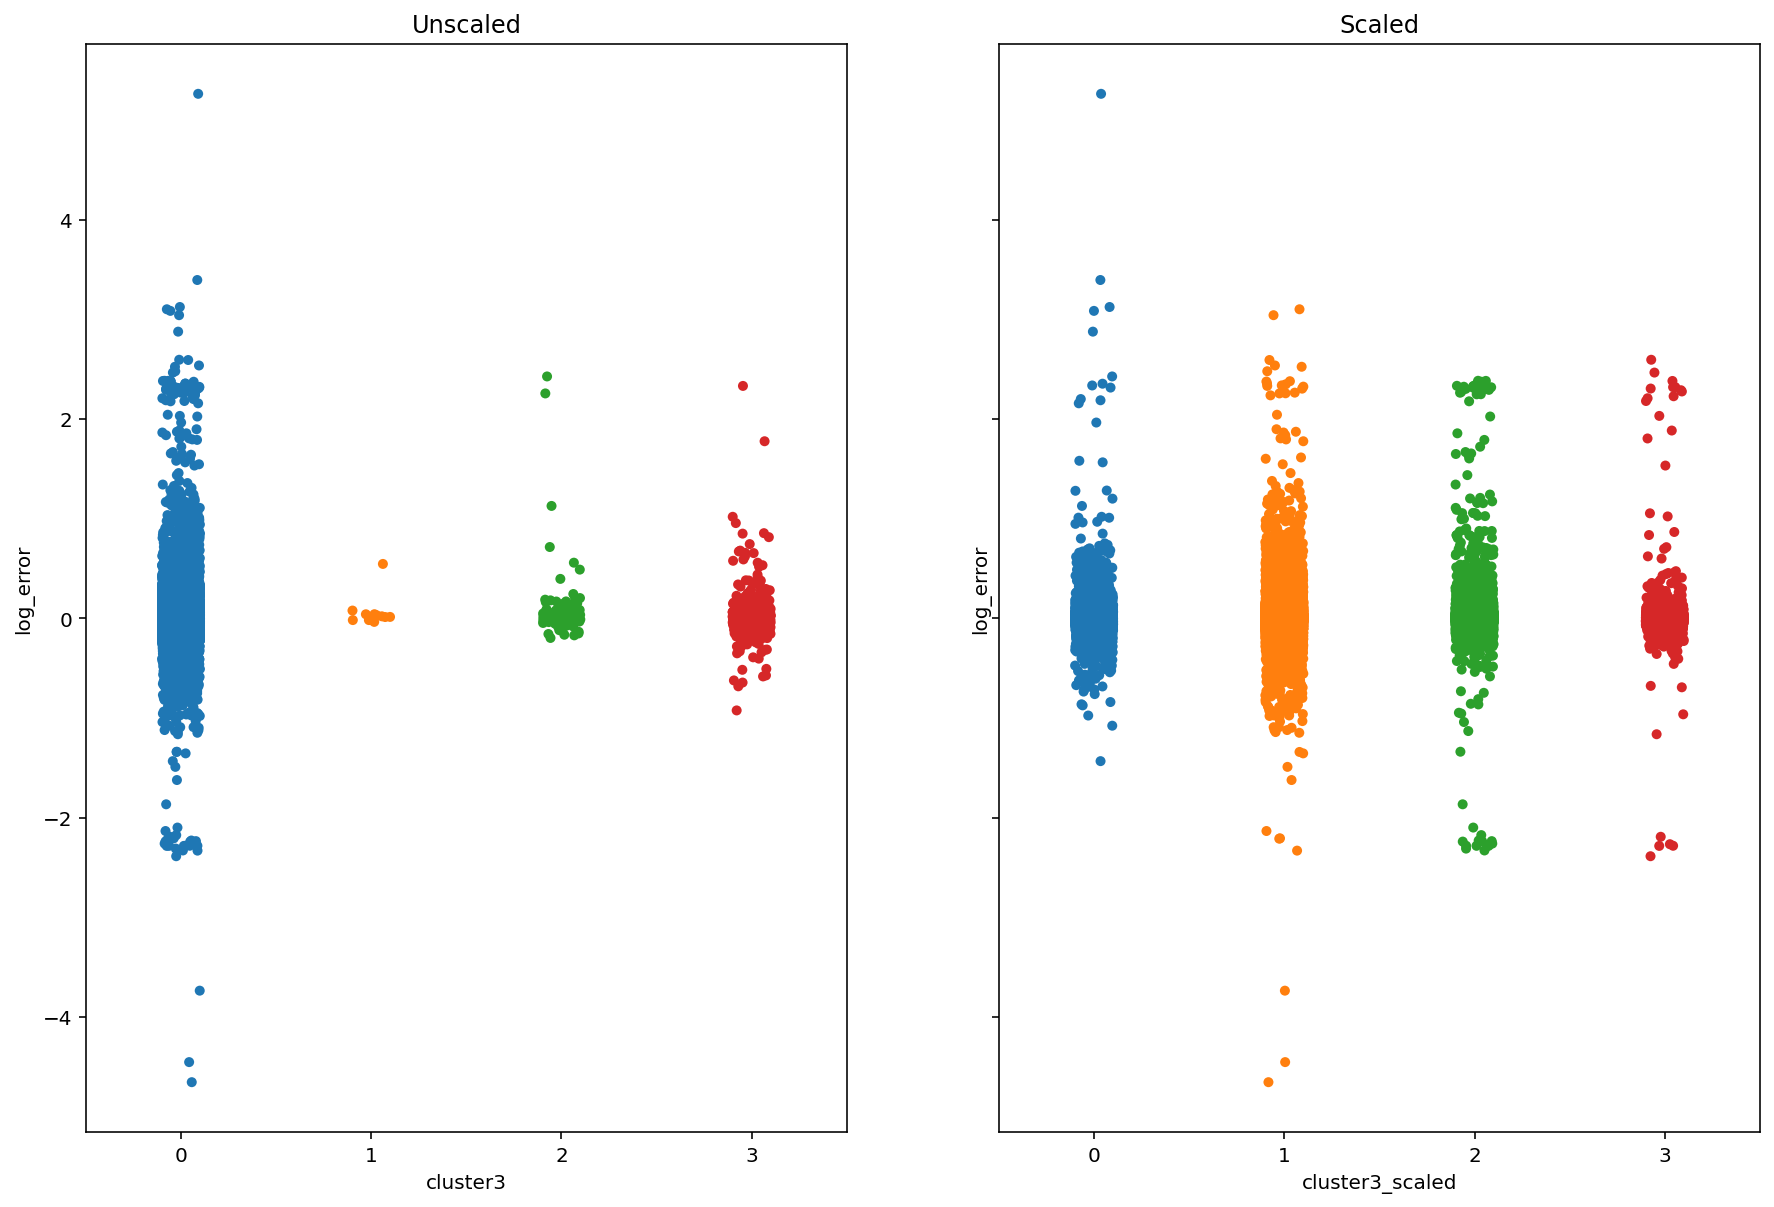

In [6]:
wn.viz_for_Q3(train)

In [7]:
train.head(1)

,parcel_id,bath_count,bed_count,calc_bath_and_bed,calc_sqft,fips,fireplace_count,garage_car_count,latitude,longitude,lot_sqft,pool_count,raw_census_tract_block,region_id_county,room_count,tax_value,assessment_year,log_error,transaction_date,cluster3
73693,12021842,4.0,3.0,4.0,3547.0,6037.0,0.0,0.0,34094724.0,-118387946.0,17285.0,1.0,6.037194e+07,3101.0,0.0,2321157.0,2016.0,-0.009462,1504656000000000000,0


In [8]:
train_scaled3.head()

NameError: name 'train_scaled3' is not defined

In [ ]:
#wn.anova_test(train, 'cluster3')

In [ ]:
#wn.anova_test(train_scaled3, 'cluster3_scaled')

In [ ]:
#train.cluster3.value_counts()